#### Preparation of the benchmark datasets: solution of ODEs, merge of the existing solutions with their grids and some info about the processes.

In [6]:
import os
import sys

sys.path.append('..\..')

import numpy as np
import h5py

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['text.usetex'] = False

SMALL_SIZE = 12
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)

I. Oridnary Differential Equation with trigonometric coefficients

$$
x \sin{t} + \frac{d x}{d t} \cos{t} = 1,
$$

To generate the data we will use an analytical particular solution, matching initial condition of $x(0) = 1.3$ (thus, $C = 1.3$) on the uniform grid with 200 nodes in the interval $(0, 4 \pi)$:

$$
x = \sin{t} + 1.3 \cos{t}.
$$

In [ ]:
from dataclasses import dataclass
from typing import Union, List, Tuple

@dataclass
class Benchmark:
    name: str   # Name of the experiment, providing the benchmark dataset
    grid: Union[np.ndarray, List[np.ndarray]]   # Grids, on which the solution is provided. Can be single np.ndarray for ODE of list of arrays for PDEs
    values: Union[np.ndarray, List[np.ndarray]] # Solution of the equations. Can be single np.ndarray (if single equation case) of list of arrays for systems
    derivatives_information: List = None   # Optional. Description of the derivatives, passed 
    derivatives: Union[np.ndarray, List[Union[np.ndarray, List[np.ndarray]]]] = None    # Optional. Arrays of derivatives

    def combine_into_h5py(file: h5py._hl.files.File):
        

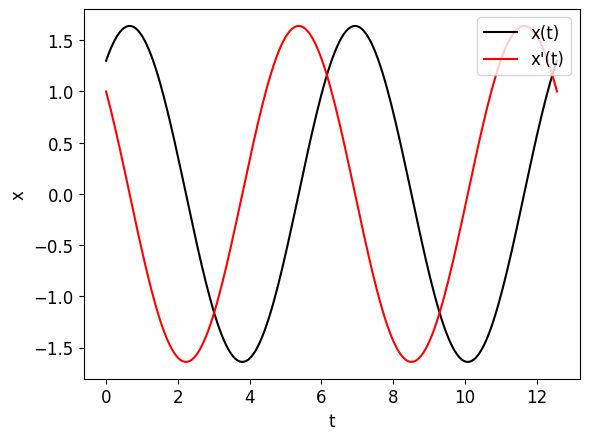

In [5]:
C = 1.3
t = np.linspace(0, 4*np.pi, 200)
x = np.sin(t) + C * np.cos(t)
x_dot = np.cos(t) - C * np.sin(t)
x_dot_dot = -np.sin(t) - C * np.cos(t)
x_dot_dot_dot = -np.cos(t) + C * np.sin(t)
max_axis_idx = x.ndim - 1

plt.plot(t, x, color = 'k', label = 'x(t)')
plt.plot(t, x_dot, color = 'r', label = "x'(t)")

plt.legend(loc = 'upper right')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

In [38]:
deriv_keys = ['x_dot', 'x_dot_dot', 'x_dot_dot_dot']
orders = [np.array([0,]), np.array([0, 0]), np.array([0, 0, 0])]
arrays = [x_dot, x_dot_dot, x_dot_dot_dot]

with h5py.File('ODE_trig.hdf5', 'w') as f:
    dataset_t = f.create_dataset('grid', data=[t,])
    dataset_x = f.create_dataset('vals', data=[x,])
    derivs_grouped = f.create_group('derivatives')
    for idx, key in enumerate(deriv_keys):
        derivs_subgrp = derivs_grouped.create_group(key)
        derivs_subgrp['var'] = 0
        derivs_subgrp['orders'] = orders[idx]
        derivs_subgrp['array'] = arrays[idx]

In [50]:
tf = h5py.File('ODE_trig.hdf5', 'w')

In [51]:
type(tf)

h5py._hl.files.File